# 数据预处理

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 数据导入
rentalhouse = pd.read_csv("for_tableau_2.csv", encoding='gbk')

# 数据清洗
rentalhouse.info() # 检查数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   district         2608 non-null   object 
 1   rent             2608 non-null   float64
 2   bedrooms         2608 non-null   int64  
 3   living-dining    2608 non-null   int64  
 4   bathrooms        2608 non-null   int64  
 5   loft             2608 non-null   int64  
 6   sqmeters         2608 non-null   int64  
 7   entire_building  2608 non-null   int64  
 8   building_type    2608 non-null   object 
 9   use_type_en      2607 non-null   object 
 10  heat             2608 non-null   int64  
 11  ac               2608 non-null   int64  
 12  balcony          2608 non-null   int64  
 13  WIFI             2608 non-null   int64  
 14  outdoor_space    2608 non-null   int64  
 15  bathtub          2608 non-null   int64  
 16  floor_heat       2608 non-null   int64  
 17  oven          

In [4]:
rentalhouse.shape

(2608, 19)

In [5]:
rentalhouse = rentalhouse.dropna() # 删除有缺失值的行
rentalhouse.shape # 查看删除后数据框的形状

(2607, 19)

In [6]:
rentalhouse = rentalhouse.drop_duplicates() # 删除重复值所在行
rentalhouse.shape # 再次查看数据框的形状

(2549, 19)

In [7]:
rentalhouse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2549 entries, 0 to 2607
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   district         2549 non-null   object 
 1   rent             2549 non-null   float64
 2   bedrooms         2549 non-null   int64  
 3   living-dining    2549 non-null   int64  
 4   bathrooms        2549 non-null   int64  
 5   loft             2549 non-null   int64  
 6   sqmeters         2549 non-null   int64  
 7   entire_building  2549 non-null   int64  
 8   building_type    2549 non-null   object 
 9   use_type_en      2549 non-null   object 
 10  heat             2549 non-null   int64  
 11  ac               2549 non-null   int64  
 12  balcony          2549 non-null   int64  
 13  WIFI             2549 non-null   int64  
 14  outdoor_space    2549 non-null   int64  
 15  bathtub          2549 non-null   int64  
 16  floor_heat       2549 non-null   int64  
 17  oven             25

## 可视化

In [10]:
#饼图
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Pie

# 导入数据
data = {'Xuhui': 1132, 'Huangpu': 541, 'Jing\'an': 512, 'Changning': 233, 'Pudong': 86, 'Putuo': 31, 'Minhang': 25, 'Qingpu': 20, 'Baoshan': 8, 'Songjiang': 6, 'Hongkou': 5, 'Zhabei': 4, 'Yangpu': 3, 'Jiading': 2}
df = pd.DataFrame(list(data.items()), columns=['district', 'count'])

# 绘制饼状图
c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(df['district'], df['count'])],
        radius=["30%", "75%"],
        label_opts=opts.LabelOpts(formatter="{b}: {c} ({d}%)"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各地区租房分布饼状图",title_textstyle_opts=opts.TextStyleOpts(font_size=20)),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%", textstyle_opts=opts.TextStyleOpts(font_size=15))
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c} ({d}%)"))
    .render_notebook()
)




c

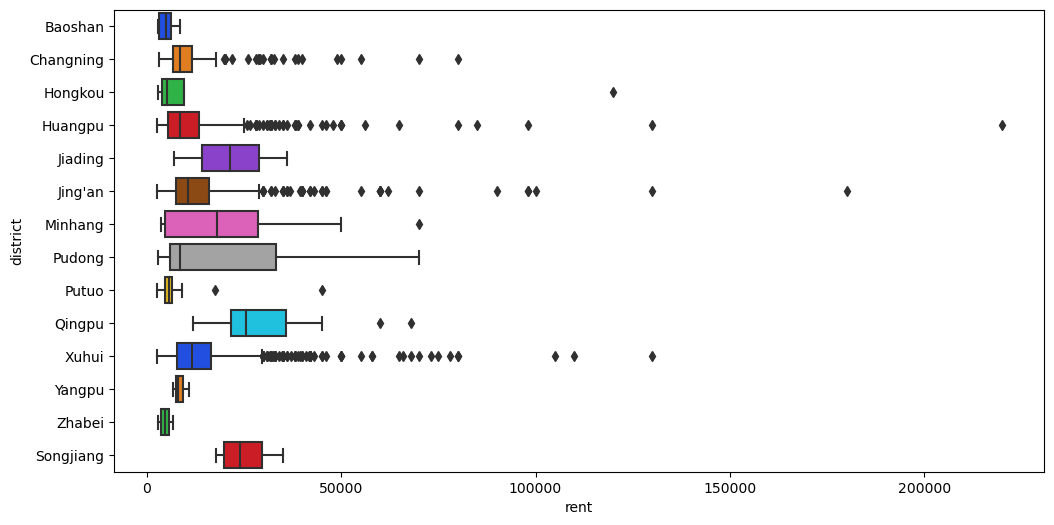

In [11]:
#箱线图
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

x_list = []
for i in range(len(pd.unique(rentalhouse['district']))):
    x_list.append(rentalhouse[rentalhouse['district'] == pd.unique(rentalhouse['district'])[i]]['rent'].tolist())

a = pd.DataFrame(pd.unique(rentalhouse['district']), columns=['district'])

data = {'district': [], 'rent': []}
for i in range(len(pd.unique(rentalhouse['district']))):
    data['district'] += [a.iloc[i, 0]] * len(x_list[i])
    data['rent'] += x_list[i]
df = pd.DataFrame(data)

sns.boxplot(x='rent', y='district', data=df, orient='h', palette='bright')

plt.show()

In [12]:
# 导入必要的库
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Pie

# 导入数据

df = rentalhouse[['district', 'sqmeters']].groupby(['district']).sum().reset_index()
df = df.rename(columns={'sqmeters': 'count'})

# 绘制饼状图
c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(df['district'], df['count'])],
        radius=["30%", "75%"],
        label_opts=opts.LabelOpts(formatter="{b}: {c} (㎡)"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各地区房源面积分布饼状图"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c} (㎡) {d}%"))
    .render_notebook()
)

c


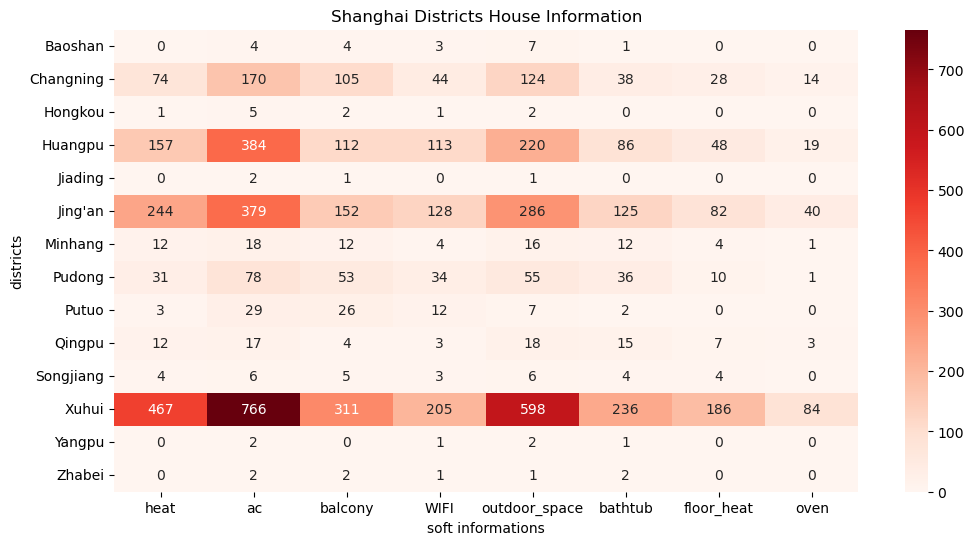

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据文件并对数据进行处理

df = rentalhouse[['district', 'heat', 'ac', 'balcony', 'WIFI', 'outdoor_space', 'bathtub', 'floor_heat', 'oven']]
df = df.groupby('district').sum()

# 绘制热力图
plt.figure(figsize=(12, 6))
sns.heatmap(df, cmap='Reds', annot=True, fmt='g')
plt.title('Shanghai Districts House Information')
plt.xlabel('soft informations')
plt.ylabel('districts')

# 显示图形
plt.show()


## 量化处理

In [14]:
#房型
y= rentalhouse.groupby(by='building_type')['rent'].mean()
y.sort_values(ascending=False, inplace=True)#按房价降序排序
y

building_type
villa                  35357.766990
detached lane house    15896.460994
attached lane house    12792.659243
public housing          9841.933635
Name: rent, dtype: float64

In [15]:
rentalhouse['building_type'].replace({'villa':4,
                                       'detached lane house':3,
                                       'attached lane house':2,
                                       'public housing':1},
                                      inplace=True)
rentalhouse.head()

,district,rent,bedrooms,living-dining,bathrooms,loft,sqmeters,entire_building,building_type,use_type_en,heat,ac,balcony,WIFI,outdoor_space,bathtub,floor_heat,oven,total_amens
0,Baoshan,2800.0,1,1,1,0,28,0,4,residential,0,0,0,0,1,0,0,0,1
1,Baoshan,3200.0,2,1,1,0,74,0,1,residential,0,0,0,0,1,0,0,0,1
2,Baoshan,3234.0,2,1,1,0,58,0,2,residential,0,0,0,0,1,0,0,0,1
3,Baoshan,5000.0,2,1,1,0,62,0,1,residential,0,1,1,0,0,0,0,0,2
4,Baoshan,5000.0,3,1,1,0,95,0,1,residential,0,1,1,1,1,0,0,0,4


In [16]:
#用途
y= rentalhouse.groupby(by='use_type_en')['rent'].mean()
y.sort_values(ascending=False, inplace=True)#按房价降序排序
y

use_type_en
multi-use      18164.282552
residential    12225.187524
Name: rent, dtype: float64

In [17]:
rentalhouse['use_type_en'].replace({'multi-use':1,
                                       'residential':0},
                                      inplace=True)
rentalhouse.head()

,district,rent,bedrooms,living-dining,bathrooms,loft,sqmeters,entire_building,building_type,use_type_en,heat,ac,balcony,WIFI,outdoor_space,bathtub,floor_heat,oven,total_amens
0,Baoshan,2800.0,1,1,1,0,28,0,4,0,0,0,0,0,1,0,0,0,1
1,Baoshan,3200.0,2,1,1,0,74,0,1,0,0,0,0,0,1,0,0,0,1
2,Baoshan,3234.0,2,1,1,0,58,0,2,0,0,0,0,0,1,0,0,0,1
3,Baoshan,5000.0,2,1,1,0,62,0,1,0,0,1,1,0,0,0,0,0,2
4,Baoshan,5000.0,3,1,1,0,95,0,1,0,0,1,1,1,1,0,0,0,4


In [18]:
#设施总数
rentalhouse['total_ssvalue'] = 0  # 先将新列所有行的值设为0
rentalhouse.loc[(rentalhouse['total_amens'] >= 0) & (rentalhouse['total_amens'] < 3), 'total_ssvalue'] = 1
rentalhouse.loc[(rentalhouse['total_amens'] >= 3) & (rentalhouse['total_amens'] < 6), 'total_ssvalue'] = 2
rentalhouse.loc[rentalhouse['total_amens'] >= 6, 'total_ssvalue'] = 3
rentalhouse.head()

,district,rent,bedrooms,living-dining,bathrooms,loft,sqmeters,entire_building,building_type,use_type_en,heat,ac,balcony,WIFI,outdoor_space,bathtub,floor_heat,oven,total_amens,total_ssvalue
0,Baoshan,2800.0,1,1,1,0,28,0,4,0,0,0,0,0,1,0,0,0,1,1
1,Baoshan,3200.0,2,1,1,0,74,0,1,0,0,0,0,0,1,0,0,0,1,1
2,Baoshan,3234.0,2,1,1,0,58,0,2,0,0,0,0,0,1,0,0,0,1,1
3,Baoshan,5000.0,2,1,1,0,62,0,1,0,0,1,1,0,0,0,0,0,2,1
4,Baoshan,5000.0,3,1,1,0,95,0,1,0,0,1,1,1,1,0,0,0,4,2


In [19]:
rentalhouse = rentalhouse.drop(['entire_building', 'heat', 'ac', 'balcony',
    'WIFI', 'outdoor_space', 'bathtub', 'floor_heat', 'oven','total_amens'], axis=1)
rentalhouse.head()

,district,rent,bedrooms,living-dining,bathrooms,loft,sqmeters,building_type,use_type_en,total_ssvalue
0,Baoshan,2800.0,1,1,1,0,28,4,0,1
1,Baoshan,3200.0,2,1,1,0,74,1,0,1
2,Baoshan,3234.0,2,1,1,0,58,2,0,1
3,Baoshan,5000.0,2,1,1,0,62,1,0,1
4,Baoshan,5000.0,3,1,1,0,95,1,0,2


In [20]:
df_=pd.get_dummies(rentalhouse['district'], prefix='district')
print(df_)

      district_Baoshan  district_Changning  district_Hongkou  \
0                 True               False             False   
1                 True               False             False   
2                 True               False             False   
3                 True               False             False   
4                 True               False             False   
...                ...                 ...               ...   
2603             False               False             False   
2604             False               False             False   
2605             False               False             False   
2606             False               False             False   
2607             False               False             False   

      district_Huangpu  district_Jiading  district_Jing'an  district_Minhang  \
0                False             False             False             False   
1                False             False             False             

In [21]:
rentalhouse = pd.concat([rentalhouse, df_], axis=1)
rentalhouse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2549 entries, 0 to 2607
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   district            2549 non-null   object 
 1   rent                2549 non-null   float64
 2   bedrooms            2549 non-null   int64  
 3   living-dining       2549 non-null   int64  
 4   bathrooms           2549 non-null   int64  
 5   loft                2549 non-null   int64  
 6   sqmeters            2549 non-null   int64  
 7   building_type       2549 non-null   int64  
 8   use_type_en         2549 non-null   int64  
 9   total_ssvalue       2549 non-null   int64  
 10  district_Baoshan    2549 non-null   bool   
 11  district_Changning  2549 non-null   bool   
 12  district_Hongkou    2549 non-null   bool   
 13  district_Huangpu    2549 non-null   bool   
 14  district_Jiading    2549 non-null   bool   
 15  district_Jing'an    2549 non-null   bool   
 16  district_Mi

In [22]:
rentalhouse.to_csv('rentalhouse.csv')

# 机器学习模型预测

## 多重线性回归模型预测

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# 进行哑编码处理
district_dummies = pd.get_dummies(rentalhouse['district'], prefix='district')

# 将哑编码后的特征添加到原数据集中
rentalhouse = pd.concat([rentalhouse, district_dummies], axis=1)

# 取出需要的特征列，并进行规范化处理
features = rentalhouse.drop(['district', 'rent'], axis=1)
scaler = StandardScaler()
features = scaler.fit_transform(features)

# 构建OLS模型并进行租金的估计
from statsmodels.api import OLS
from statsmodels.tools import add_constant


X = add_constant(features)
y = rentalhouse['rent']
model = OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     340.4
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:44:45   Log-Likelihood:                -26166.
No. Observations:                2549   AIC:                         5.238e+04
Df Residuals:                    2527   BIC:                         5.250e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.401e+04    138.228    101.387      0.0

In [24]:
# 方差齐次性检验
import statsmodels.stats.api as sms
test = sms.het_goldfeldquandt(model.resid, X)
print('p-value:', test[1])



p-value: 0.9999999932131324


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.api import OLS
from statsmodels.tools import add_constant
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 进行哑编码处理
district_dummies = pd.get_dummies(rentalhouse['district'], prefix='district')

# 将哑编码后的特征添加到原数据集中
rentalhouse = pd.concat([rentalhouse, district_dummies], axis=1)

# 取出需要的特征列，并进行规范化处理
features = rentalhouse.drop(['district', 'rent'], axis=1)
scaler = StandardScaler()
features = scaler.fit_transform(features)

# 构建OLS模型并进行租金的估计
X = add_constant(features)
y = rentalhouse['rent']
model = OLS(y, X).fit()

# 计算均方误差 (MSE)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("OLS模型均方误差 (MSE):", mse)
print("OLS模型平均绝对误差 (MAE):", mae)
print("OLS模型R^2分数:", r2)


OLS模型均方误差 (MSE): 48291303.89282729
OLS模型平均绝对误差 (MAE): 3422.391132061593
OLS模型R^2分数: 0.7387836716557841


## ridge回归

In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 创建ridge模型
ridge = Ridge()

# 创建超参数字典
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 20, 30, 40, 45, 49, 50.3,50.4,50.45,50.6,51.15, 51.2,51.3,51.5,52]}

# 创建网格搜索模型
grid_model = GridSearchCV(ridge, params, cv=5, scoring='r2')
X = add_constant(features)
y = rentalhouse['rent']
# 构建训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 将模型拟合到训练数据上
grid_model.fit(X_train, y_train)

# 打印最佳超参数和对应的R^2分数
print("Best Score:", grid_model.best_score_)
print("Best Params:", grid_model.best_params_)

# 使用最佳超参数创建模型
best_alpha = grid_model.best_params_['alpha']
reg = Ridge(alpha=best_alpha)
reg.fit(X_train, y_train)

# 预测和评估模型
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge模型均方误差 (MSE):", mse)
print("Ridge模型平均绝对误差 (MAE):", mae)
print("Ridge模型R^2分数:", r2)


Best Score: 0.7255031461100236
Best Params: {'alpha': 51.5}
Ridge模型均方误差 (MSE): 39933871.06535557
Ridge模型平均绝对误差 (MAE): 3396.1945063355674
Ridge模型R^2分数: 0.7227899514274598


## Lasso模型

In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 创建Lasso回归模型
lasso_model = Lasso()

# 创建超参数字典
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 20, 30, 40, 45, 49, 50.3, 50.4, 50.45, 50.6, 51.15, 51.2, 51.3, 51.5, 52]}

# 创建网格搜索模型
grid_model = GridSearchCV(lasso_model, params, cv=5, scoring='r2')
X = features
y = rentalhouse['rent']

# 构建训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 将模型拟合到训练数据上
grid_model.fit(X_train_scaled, y_train)

# 打印最佳超参数和对应的R^2分数
print("Best Score:", grid_model.best_score_)
print("Best Params:", grid_model.best_params_)

# 使用最佳超参数创建模型
best_alpha = grid_model.best_params_['alpha']
lasso_reg = Lasso(alpha=best_alpha)

lasso_reg.fit(X_train_scaled, y_train)

# 预测和评估模型
y_pred = lasso_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso回归模型均方误差 (MSE):", mse)
print("Lasso回归模型平均绝对误差 (MAE):", mae)
print("Lasso回归模型R^2分数:", r2)


Best Score: 0.7249166474853266
Best Params: {'alpha': 52}
Lasso回归模型均方误差 (MSE): 39785007.952161126
Lasso回归模型平均绝对误差 (MAE): 3357.1056784729712
Lasso回归模型R^2分数: 0.723823318585173


## 对比决策回归树

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# 进行哑编码处理
district_dummies = pd.get_dummies(rentalhouse['district'], prefix='district')

# 将哑编码后的特征添加到原数据集中
rentalhouse = pd.concat([rentalhouse, district_dummies], axis=1)

# 取出需要的特征列，并进行规范化处理
features = rentalhouse.drop(['district', 'rent'], axis=1)
scaler = StandardScaler()
features = scaler.fit_transform(features)

# # 创建决策树回归模型

# 构建训练集和测试集
X = features
y = rentalhouse['rent']

# 定义参数网格
param_grid = {
    'max_depth': [None,4,5,6,10,15,19,20,21,30],
    'min_samples_split': [1,2,3,5,10,15,20,25,30,35,40,45],
    'min_samples_leaf': [1,2,3,4,5,6,7,8],
    'max_features': [None, 'sqrt', 'log2']
}

# 创建决策树回归模型
regressor = DecisionTreeRegressor(random_state=42)

# 使用GridSearchCV来寻找最佳参数组合
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 输出最佳参数组合
best_params = grid_search.best_params_
print("最佳参数组合:", best_params)

# 使用最佳参数组合的模型进行预测
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("决策回归树模型均方误差 (MSE):", mse)
print("决策回归树模型平均绝对误差 (MAE):", mae)
print("决策回归树模型R^2分数:", r2)


最佳参数组合: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 2}
决策回归树模型均方误差 (MSE): 38802760.95115633
决策回归树模型平均绝对误差 (MAE): 3287.29690056596
决策回归树模型R^2分数: 0.7306418095452191


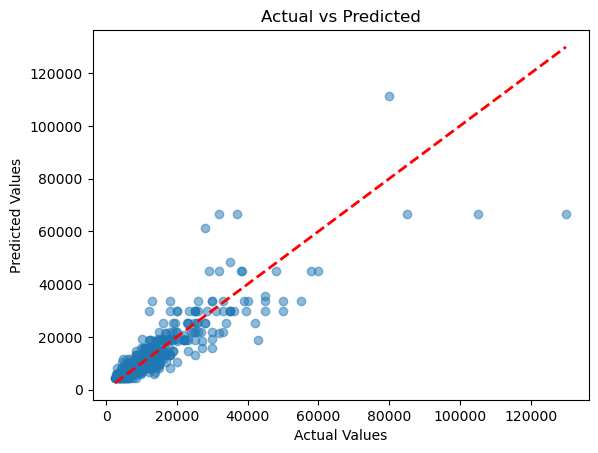

In [29]:
import matplotlib.pyplot as plt

# 绘制实际值与预测值的散点图
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')

# 添加一条对角线，表示完美的预测
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()


## 随机森林模型

In [30]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 创建随机森林模型
rf_model = RandomForestRegressor()

# 创建超参数字典
params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'min_samples_split': [10,20,50],
    'min_samples_leaf': [4,5,10]
}

# 创建网格搜索模型
grid_model = GridSearchCV(rf_model, params, cv=5, scoring='r2')
X = features
y = rentalhouse['rent']

# 构建训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 将模型拟合到训练数据上
grid_model.fit(X_train, y_train)

# 打印最佳超参数和对应的R^2分数
print("Best Score:", grid_model.best_score_)
print("Best Params:", grid_model.best_params_)

# 使用最佳超参数创建模型
best_params = grid_model.best_params_
rf_reg = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

rf_reg.fit(X_train, y_train)

# 预测和评估模型
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("随机森林模型均方误差 (MSE):", mse)
print("随机森林模型平均绝对误差 (MAE):", mae)
print("随机森林模型R^2分数:", r2)


Best Score: 0.7454430582450289
Best Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
随机森林模型均方误差 (MSE): 37931063.679455146
随机森林模型平均绝对误差 (MAE): 3076.499967549816
随机森林模型R^2分数: 0.7366928944158384
